In [9]:
print("HI")


HI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words:
budget: 322
tax: 320
class: 216
middle: 195
people: 174
government: 149
taxes: 128
bjp: 115
india: 112
like: 93


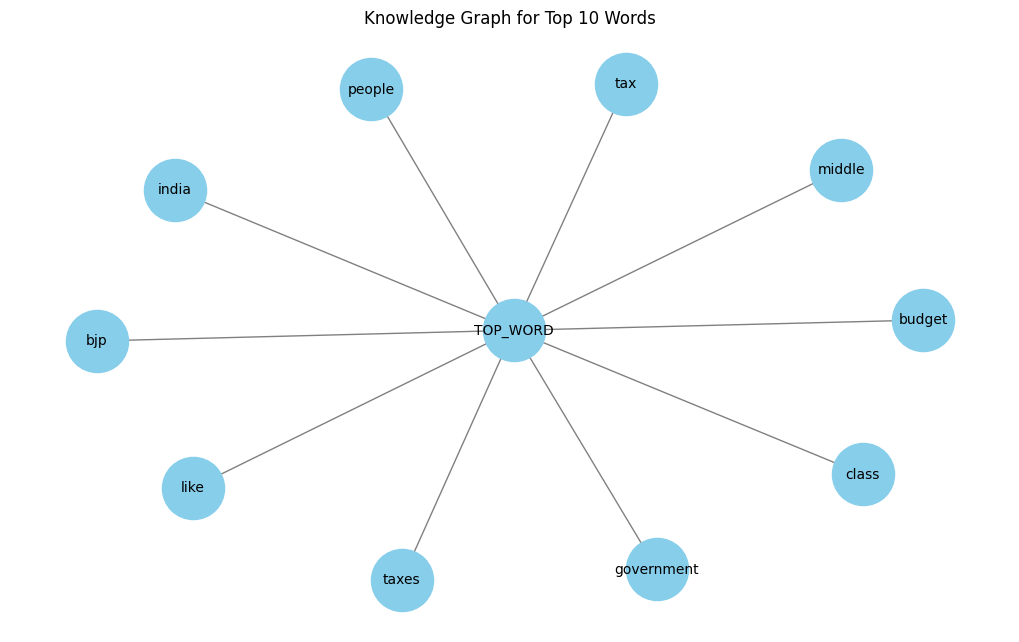

In [3]:
import pandas as pd
import nltk
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the Excel file
excel_file = r"/content/prepared_fds_sorted.xlsx"
df = pd.read_excel(excel_file)

# Rename the comments column to 'COMMENT' (replace 'your_comments_column_name' with the actual column name)
df.rename(columns={'your_comments_column_name': 'COMMENT'}, inplace=True)

# Combine all comments into a single string
text_data = ' '.join(df['COMMENT'].astype(str).tolist())

# Step 1: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower())  # Tokenize and lower case
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)
print("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

# Step 3: Create Knowledge Graph for Top 10 Words
edges = [(word, "TOP_WORD") for word, _ in top_10_words]  # Create edges for top words

# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 4: Draw the knowledge graph
plt.figure(figsize=(10, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=2000,
        font_size=10, font_color='black', edge_color='gray')
plt.title('Knowledge Graph for Top 10 Words')
plt.show()


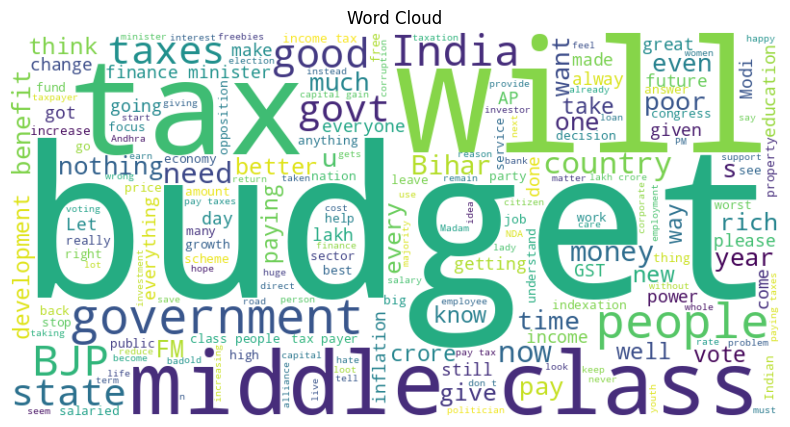

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [5]:
from nltk import ngrams
import collections

# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)

# Count the top 10 bigrams
top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
    print(f"{' '.join(bigram)}: {count}")



Top 10 Bigrams:
middle class: 180
finance minister: 34
income tax: 23
class people: 22
paying taxes: 22
pay taxes: 21
pay tax: 20
tax payers: 19
good budget: 15
lakh crore: 14


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Check if the 'COMMENT' column is empty
if df['COMMENT'].isnull().all() or df['COMMENT'].empty:
    print("The comments column is empty or contains only null values.")
else:
    # Initialize the TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Fit and transform the comments column
    tfidf_matrix = vectorizer.fit_transform(df['COMMENT'].astype(str))  # Ensure comments are strings

    # Convert to DataFrame for better visualization
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # Display the TF-IDF Matrix
    print("\nTF-IDF Matrix:")
    print(tfidf_df.head())



TF-IDF Matrix:
   000  000crore   02   05   10  100  1000  10000  100000  101  ...  \
0  0.0       0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  0.0  ...   
1  0.0       0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  0.0  ...   
2  0.0       0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  0.0  ...   
3  0.0       0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  0.0  ...   
4  0.0       0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  0.0  ...   

   yesterday  yojana  young  youngsters  youth  youths   yr  yrs   ys  zero  
0        0.0     0.0    0.0         0.0    0.0     0.0  0.0  0.0  0.0   0.0  
1        0.0     0.0    0.0         0.0    0.0     0.0  0.0  0.0  0.0   0.0  
2        0.0     0.0    0.0         0.0    0.0     0.0  0.0  0.0  0.0   0.0  
3        0.0     0.0    0.0         0.0    0.0     0.0  0.0  0.0  0.0   0.0  
4        0.0     0.0    0.0         0.0    0.0     0.0  0.0  0.0  0.0   0.0  

[5 rows x 3564 columns]
